In [2]:
import pandas as pd
from dataset_functions import Dataset_Formatter
from mordred import Calculator, descriptors
from glob import glob

mk = Dataset_Formatter()
 

In [51]:
files = glob('/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_*.csv.gz')
files

['/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_3.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_4.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_2.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_1.csv.gz']

In [52]:
import re
# Function to extract the number from the file name
def extract_number(file_path):
    match = re.search(r'PMG_rdkit_(\d+)', file_path)
    return int(match.group(1)) if match else float('inf')

# Sort the list using the extracted numbers
sorted_file_paths = sorted(files, key=extract_number)
print(sorted_file_paths)


['/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_1.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_2.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_3.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_4.csv.gz']


In [1]:
for file in sorted_file_paths:
    print(file)
    chunks = pd.read_csv(file, compression='gzip', chunksize=200000)
    for chunk in chunks:
        print(chunk)

NameError: name 'sorted_file_paths' is not defined

In [112]:
# Cleaning up all docking files (resetting to blank)
from glob import glob
for file in glob('/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_*'):
    df = pd.read_csv(file, index_col='ID')
    try:
        df.loc["PMG-483604"] = ''
    except:
        print("not in batch")
   # df['Affinity(kcal/mol)'] = df['Affinity(kcal/mol)'].replace('PD', '')
    #df['Affinity(kcal/mol)'] = ''
    df.to_csv(file, index_label='ID')

In [18]:
mol_ds = pd.read_csv('/users/yhb18174/Recreating_DMTA/docking/PyMolGen/PMG-810414/PMG-810414_all_scores.csv', index_col='ID')
mol_ds.sort_values(ascending=True, by='Affinity(kcal/mol)')

,Unnamed: 0,conf_no,Pose_no,Affinity(kcal/mol),Intramol(kcal/mol),CNN_Pose_Score,CNN_affinity
ID,,,,,,,
PMG-810414_conf_0_pose_1,0,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,28,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,21,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,15,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,10,0,1,-7.84,0.03,0.9649,6.761
...,...,...,...,...,...,...,...
PMG-810414_conf_2_pose_1,100,2,1,-7.17,0.40,0.9651,6.850
PMG-810414_conf_2_pose_6,110,2,6,-7.11,0.11,0.9357,6.649
PMG-810414_conf_2_pose_6,116,2,6,-7.11,0.11,0.9357,6.649


In [26]:
import re
def molid2batchno(molid: str, prefix: str, dataset_file: str, chunksize: int = 100000):
    """
    Description
    -----------
    Function to get the batch which the molecule is in from its ID
    
    Parameters
    ----------
    molid (str)         ID of a molecule
    prefix (str)        Prefix of the molecule ID
    dataset_file (str)  Common filename of dataset
    chunksize (int)    Number of molecules per batch

    Returns
    -------
    Batch number which the molecule with molid is in
    """

    # Extract the molecule number from its ID
    mol_no = int(molid.replace(prefix, ""))

    # List and sort files
    file_ls = glob(dataset_file)
    file_ls.sort(key=lambda x: int(re.search(r"\d+", x).group()))

    # Determine the batch number
    batch_number = (mol_no - 1) // chunksize + 1

    # Check if batch number exceeds number of available files
    if batch_number > len(file_ls):
        raise ValueError(
            f"Batch number {batch_number} exceeds the number of available dataset files."
        )

    return batch_number


In [10]:
molid2batchno(molid="PMG-815266", prefix='PMG-', dataset_file="/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_*")

9

In [18]:
import pandas as pd
pd.read_csv('~/Recreating_DMTA/docking/PyMolGen/PMG-815266/PMG-815266_all_scores.csv').sort_values(ascending=True, by='Affinity(kcal/mol)')

,Unnamed: 0,ID,conf_no,Pose_no,Affinity(kcal/mol),Intramol(kcal/mol),CNN_Pose_Score,CNN_affinity
137,137,PMG-815266_conf_3_pose_2,3,2,-7.45,-0.21,0.9123,6.298
139,139,PMG-815266_conf_3_pose_2,3,2,-7.45,-0.21,0.9123,6.298
142,142,PMG-815266_conf_3_pose_2,3,2,-7.45,-0.21,0.9123,6.298
172,172,PMG-815266_conf_3_pose_2,3,2,-7.45,-0.21,0.9123,6.298
146,146,PMG-815266_conf_3_pose_2,3,2,-7.45,-0.21,0.9123,6.298
...,...,...,...,...,...,...,...,...
220,220,PMG-815266_conf_4_pose_5,4,5,-5.92,-0.66,0.8839,6.275
199,199,PMG-815266_conf_4_pose_5,4,5,-5.92,-0.66,0.8839,6.275
215,215,PMG-815266_conf_4_pose_8,4,8,-5.90,-0.77,0.8368,5.979
223,223,PMG-815266_conf_4_pose_8,4,8,-5.90,-0.77,0.8368,5.979


In [46]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

dir = "20240904_10_rmpo"

perf_rmse = []
ho_rmse = []

for n in range(0, 31):
    perf_stats_path = f"/users/yhb18174/Recreating_DMTA/results/rdkit_desc/{dir}/it{n+1}/performance_stats.json"
    hold_out = f"/users/yhb18174/Recreating_DMTA/results/rdkit_desc/{dir}/it{n+1}/held_out_test/held_out_test_stats.csv"

    with open(perf_stats_path, 'r') as stats:
        data = json.load(stats)

    perf_rmse.append(data["RMSE"])

    ho_df = pd.read_csv(hold_out, index_col="Unnamed: 0")

    ho_rmse.append(round(ho_df.loc['RMSE', 'Value'], 3))



In [47]:
print(ho_rmse)

[0.54, 0.504, 0.499, 0.492, 0.494, 0.486, 0.474, 0.472, 0.463, 0.458, 0.456, 0.453, 0.448, 0.452, 0.448, 0.445, 0.44, 0.441, 0.438, 0.437, 0.438, 0.437, 0.435, 0.433, 0.436, 0.432, 0.428, 0.43, 0.429, 0.43, 0.427]


Text(0, 0.5, 'RMSE')

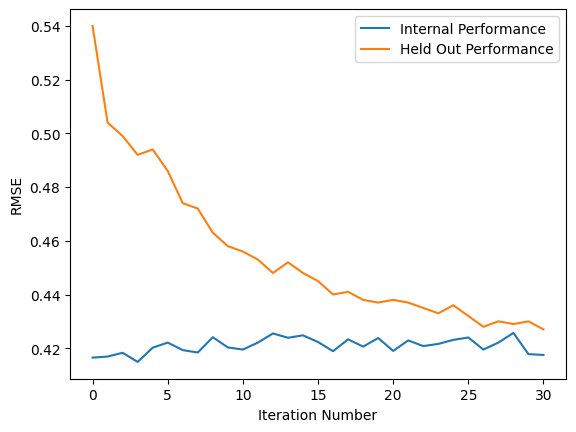

In [53]:
iterations = list(range(len(perf_rmse)))
sns.lineplot(x=iterations, y=perf_rmse, label='Internal Performance')
sns.lineplot(x=iterations, y=ho_rmse, label="Held Out Performance")
plt.xlabel("Iteration Number")
plt.ylabel("RMSE")


In [3]:
import sys
sys.path.insert(0, "/users/yhb18174/Recreating_DMTA/scripts/misc/")
from misc_functions import performance_csv_to_json

In [20]:
import sys 
PROJ_DIR = '/users/yhb18174/Recreating_DMTA/'

# Misc
sys.path.insert(0, PROJ_DIR + "/scripts/misc/")
from misc_functions import molid2batchno, performance_csv_to_json, count_number_iters


performance_csv_to_json(
    experiment_ls=['20240904_10_r', '20240904_10_mp', '20240904_10_mpo', '20240904_10_rmp', '20240904_10_rmpo', '20240904_10_mu'],
    results_dir='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/'
)

/users/yhb18174/Recreating_DMTA/results/rdkit_desc/20240904_10_r
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats
reformatted stats

In [3]:
sys.path.insert(0, PROJ_DIR + "/scripts/run/")
from analysis_class import Analysis

In [ ]:
molid2batchno(molid="PMG-815266", prefix='PMG-', dataset_file="/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_*")

In [15]:
from pathlib import Path
import subprocess
scores_col= "Affinity(kcal/mol)"
ascending=True


for ids in ['PMG-1855240', 'PMG-1899603']:
    batch_no = molid2batchno(molid="PMG-815266", prefix='PMG-', dataset_file="/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_*")
    dock_csv = f"/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_{batch_no}.csv"
    dock_df = pd.read_csv(dock_csv, index_col='ID', dtype=str)
    PROJ_DIR = Path('/users/yhb18174/Recreating_DMTA')
    tar_file = PROJ_DIR / 'docking' / 'PyMolGen' / f'{ids}.tar.gz'


    if tar_file.exists():
        output_dir = PROJ_DIR / 'docking' / 'PyMolGen' / f'{ids}_extracted'
        output_dir.mkdir(parents=True, exist_ok=True)
        
        # Extract the tar.gz file
        command = ['tar', '-xzf', str(tar_file), '-C', str(output_dir)]
        try:
            subprocess.run(command, check=True)
            print(f"Successfully extracted {tar_file}.")
            
            # Unzip the .csv.gz file
            gz_file = output_dir / f'/{ids}/{ids}_all_scores.csv.gz'
            gunzip_command = ['gunzip', str(gz_file)]
            try:
                subprocess.run(gunzip_command, check=True)
                print(f"Successfully unzipped {gz_file}.")
                
                # Read and process the unzipped CSV file
                csv_file = output_dir / f'{ids}/{ids}_all_scores.csv'
                id_dock_scores = pd.read_csv(csv_file, index_col='ID').sort_values(ascending=ascending, by=scores_col)
                dock_score = id_dock_scores[scores_col].iloc[0]

                # Update the docking DataFrame
                dock_df.at[ids, scores_col] = dock_score
                dock_df.to_csv(dock_csv)  # Save the updated DataFrame

                # Remove the extracted directory
                rm_command = ["rm", "-r", str(output_dir)]
                subprocess.run(rm_command, check=True)
                print(f"Removed temporary files for {ids}.")

                ids_changed.append(ids)

            except subprocess.CalledProcessError as e:
                print(f"Failed to unzip {gz_file}. Error: {e}")

        except subprocess.CalledProcessError as e:
            print(f"Failed to extract {tar_file}. Error: {e}")

Successfully extracted /users/yhb18174/Recreating_DMTA/docking/PyMolGen/PMG-1855240.tar.gz.
Failed to unzip /PMG-1855240/PMG-1855240_all_scores.csv.gz. Error: Command '['gunzip', '/PMG-1855240/PMG-1855240_all_scores.csv.gz']' returned non-zero exit status 1.
Successfully extracted /users/yhb18174/Recreating_DMTA/docking/PyMolGen/PMG-1899603.tar.gz.
Failed to unzip /PMG-1899603/PMG-1899603_all_scores.csv.gz. Error: Command '['gunzip', '/PMG-1899603/PMG-1899603_all_scores.csv.gz']' returned non-zero exit status 1.


gzip: /PMG-1855240/PMG-1855240_all_scores.csv.gz: No such file or directory
gzip: /PMG-1899603/PMG-1899603_all_scores.csv.gz: No such file or directory


In [150]:
training_path = "/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/"
targs_df = pd.read_csv(training_path + "dock/new_ChEMBL_docking_df.csv", index_col="ID").drop(columns=['Unnamed: 0'])
targs = targs_df[["Affinity(kcal/mol)"]]
falsetargs = targs_df[targs_df["Affinity(kcal/mol)"] == "False"]
targs = targs.drop(index=falsetargs.index)
chembl_feats = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID')
chembl_feats = chembl_feats.loc[targs.index]

In [160]:
ho_df = pd.read_csv("/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv", index_col="ID").drop(columns=['Unnamed: 0'])
ho = ho_df[["Affinity(kcal/mol)"]]
falseho = ho_df[ho_df["Affinity(kcal/mol)"] == "False"]
ho_ = ho.drop(index=falseho.index)
ho_feats = pd.read_csv("/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_desc.csv", index_col='ID')
ho_feats = ho_feats.loc[ho_.index]


In [43]:
import numpy as np
targ = targs['Affinity(kcal/mol)'].astype(float)
ho = ho_['Affinity(kcal/mol)'].astype(float)

mean = round(np.mean(targ),2)
max = round(np.max(targ),2)
min = round(np.min(targ),2)

homean = round(np.mean(ho), 2)
homax =round(np.max(ho),2)
homin = round(np.min(ho),2)


dict = {
    "ChEMBL":
    {
    "mean": mean,
    "max": max,
    "min": min
    },
    "Held Out":
    {
    "mean": homean,
    "max": homax,
    "min": homin,
    }
         
        }

dict

{'ChEMBL': {'mean': -8.35, 'max': -4.27, 'min': -11.05},
 'Held Out': {'mean': -8.63, 'max': -6.88, 'min': -10.54}}

In [88]:
import joblib

rf_model = joblib.load('/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/final_model.pkl')

import pickle

with open('/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/final_model.pkl', 'rb') as feats:
    data = pickle.load(feats)



In [90]:
feats_df = pd.read_csv(
   "/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_desc.csv",
    index_col="ID"
)
save_path = "/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0"

same_value_columns = feats_df.columns[~feats_df.apply(lambda col: col.nunique() == 100)]
new_feat_df = feats_df[same_value_columns]
new_feat_df = new_feat_df.drop(index=falseho.index)

new_feat_df = new_feat_df[data.tolist()]

In [91]:
preds = rf_model.predict(new_feat_df)

In [92]:
ho_['pred_Affinity(kcal/mol)'] = preds

In [139]:
ho_ds = pd.DataFrame(ho_['Affinity(kcal/mol)'])

In [152]:
ho_ds.to_csv('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_targ_trimmed.csv', index_label='ID')

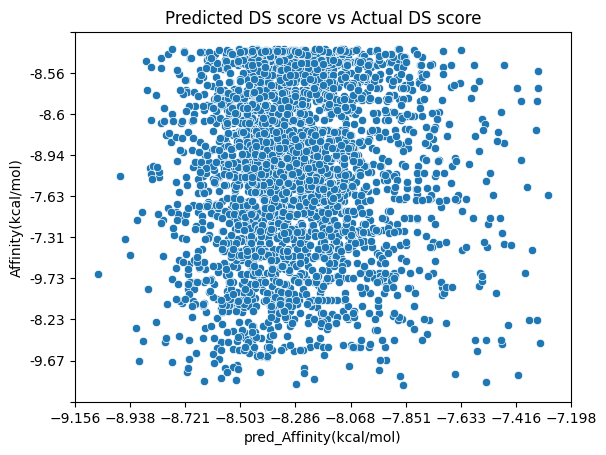

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



# Example data
# Assuming ho_ is your DataFrame and has columns 'pred_Affinity(kcal/mol)' and 'Affinity(kcal/mol)'
# If ho_ is not defined, replace with your actual data
x = ho_['pred_Affinity(kcal/mol)']
y = ho_['Affinity(kcal/mol)']

# Create scatter plot
sns.scatterplot(data=ho_, x='pred_Affinity(kcal/mol)', y='Affinity(kcal/mol)')

# Calculate R^2 value
r2 = r2_score(y, x)

# Get current axis
ax = plt.gca()

# Set ticks for x and y axes
x_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 10)
y_ticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 10)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_title('Predicted DS score vs Actual DS score')

# Show plot
plt.savefig('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/init_preds_vs_actual.png')

In [117]:
save = ho_.drop(columns=["Affinity(kcal/mol)"])
save.to_csv('~/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/held_out_test/held_out_test_preds.csv', index_label='ID')

In [127]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
true = ho_['Affinity(kcal/mol)'].astype(float)
pred = ho_['pred_Affinity(kcal/mol)'].astype(float)

errors = true - pred

# Calculate performance metrics
bias = np.mean(errors)
sdep = (np.mean((true - pred - (np.mean(true - pred))) ** 2)) ** 0.5
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
r2 = r2_score(true, pred)

dict = {
    'Bias' : round(bias,3),
    'SDEP': round(sdep,3),
    'MSE': round(mse, 3),
    'RMSE': round(rmse, 3),
    'r2': round(r2, 3)
}

In [131]:
import json
with open('/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/held_out_test/held_out_stats.json', 'w') as file:
    json.dump(dict, file, indent=4)

In [136]:
from rdkit import Chem
import random

docking_df = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv', index_col='ID')
docking_smi = docking_df['SMILES']
random.sample(docking_smi, 10)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).